In [36]:
%autosave 0
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

from datetime import date, timedelta
from joblib import dump

import warnings
warnings.filterwarnings("ignore") 

Autosave disabled


Start Day : 28/03

Trying to predict number of new cases & deaths one day before

Working with data update everyday here : https://ourworldindata.org/coronavirus-source-data
I take the full dataset linked

In [37]:
## Today Data scrap on nb 00 
df = pd.read_csv(f"AzureSC\\Base_Files\\full_data{date.today()}.csv")

In [38]:
df.head(3)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [39]:
df.tail(3)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
24944,OWID_WRL,NaN,World,2020-06-19,8456815.0,138667.0,456956.0,6326.0,1084.931,17.790,...,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
24945,OWID_WRL,NaN,World,2020-06-20,8634087.0,177272.0,461982.0,5026.0,1107.673,22.742,...,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
24946,OWID_WRL,NaN,World,2020-06-21,8795672.0,161585.0,466189.0,4207.0,1128.403,20.730,...,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58


In [40]:
df['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

# Data Exploration

In [41]:
def massBalance(subject,df,country):
    """ Plot evolution of data by columns
    params :
        subject = name of cols concerned by the plot
        df = The Dataframe
        country = Name of location isolated for the plot
    """
    df = df[df['location'].isin([f"{country}"])]
    df = df.iloc[::-1]
    thisPlot = px.line(x=df["date"], y=df[f"{subject}"])
    thisPlot.update_layout(title=f"Covid {subject} {country}",
                           xaxis_title="Day",
                           yaxis_title="Volume",
                           font=dict(family="Courier New, monospace",size=18, color="#78281F"))
    thisPlot.show()

In [42]:
## Plotly graph will be not display on Git ##
massBalance("total_deaths",df,"World")
massBalance("total_deaths",df,"France")
massBalance("total_deaths",df,"China")
massBalance("total_deaths",df,"Italy")
massBalance("total_deaths",df,"Spain")
massBalance("total_deaths",df,"United States")
massBalance("total_deaths",df,"Germany")
massBalance("total_deaths",df,"Iran")
massBalance("total_deaths",df,"Turkey")
massBalance("total_deaths",df,"Brazil")

In [43]:
## Plotly graph will be not display on Git ##
massBalance("total_cases",df,"World")
massBalance("total_cases",df,"France")
massBalance("total_cases",df,"China")
massBalance("total_cases",df,"Italy")
massBalance("total_cases",df,"Spain")
massBalance("total_cases",df,"United States")
massBalance("total_cases",df,"United Kingdom")
massBalance("total_cases",df,"Germany")
massBalance("total_cases",df,"Iran")
massBalance("total_cases",df,"Turkey")
massBalance("total_cases",df,"Brazil")

In [44]:
def newOverTime(subject,df,country):
    df = df[df['location'].isin([f"{country}"])]
    df = df.iloc[::-1]
    thisPlot = px.bar(df, x=df["date"], y=df[f'{subject}'])
    thisPlot.update_layout(title=f"Covid {subject} {country}",
                           xaxis_title="Day",
                           yaxis_title="Volume",
                           font=dict(family="Courier New, monospace",size=18, color="#78281F"))
    thisPlot.show()

In [45]:
## Plotly graph will be not display on Git ##
newOverTime("new_cases",df,"World")
newOverTime("new_cases",df,"France")
newOverTime("new_cases",df,"China")
newOverTime("new_cases",df,"Italy")
newOverTime("new_cases",df,"Spain")
newOverTime("new_cases",df,"United States")
newOverTime("new_cases",df,"United Kingdom")
newOverTime("new_cases",df,"Germany")
newOverTime("new_cases",df,"Iran")
newOverTime("new_cases",df,"Turkey")
newOverTime("new_cases",df,"Brazil")

In [46]:
## Plotly graph will be not display on Git ##
newOverTime("new_deaths",df,"World")
newOverTime("new_deaths",df,"France")
newOverTime("new_deaths",df,"China")
newOverTime("new_deaths",df,"Italy")
newOverTime("new_deaths",df,"Spain")
newOverTime("new_deaths",df,"United States")
newOverTime("new_deaths",df,"United Kingdom")
newOverTime("new_deaths",df,"Germany")
newOverTime("new_deaths",df,"Iran")
newOverTime("new_deaths",df,"Turkey")
newOverTime("new_deaths",df,"Brazil")

In [47]:
def worldrep(subject,graph_long=5,val_larg=1000000,df=df):
    fidf_mod = df.sort_values(subject, axis=0, ascending =False).head(500)
    f, ax = plt.subplots(figsize=(15, graph_long))

    ax.set(xlim=(0, val_larg), 
           ylabel= "Pays",
           xlabel= subject,
           Title= (f"{subject} by country")
          )
    ax.legend()
    sns.despine(top=True)
    ax = sns.barplot(x=fidf_mod[subject], y=fidf_mod["location"])


No handles with labels found to put in legend.


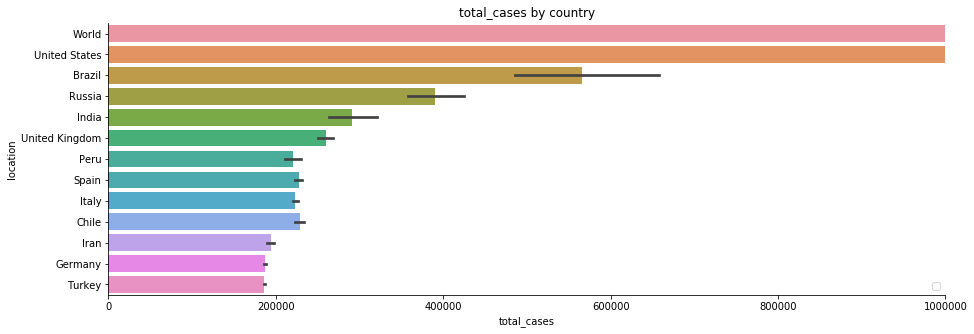

In [48]:
worldrep("total_cases")

No handles with labels found to put in legend.


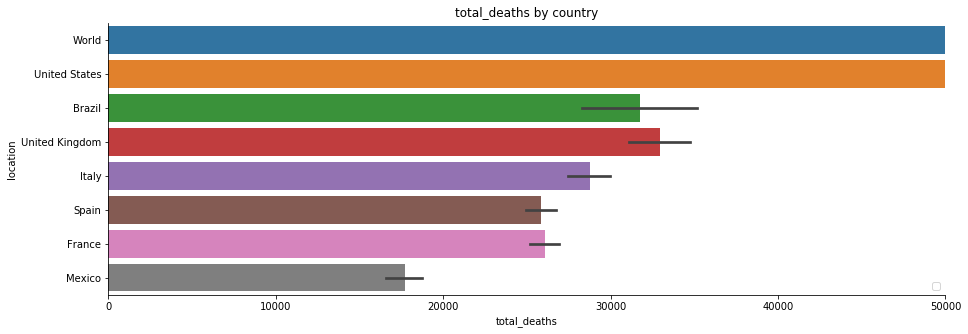

In [49]:
worldrep("total_deaths",val_larg=50000)

In [50]:
dds = df[df["date"].isin([f'{date.today()}'])]

No handles with labels found to put in legend.


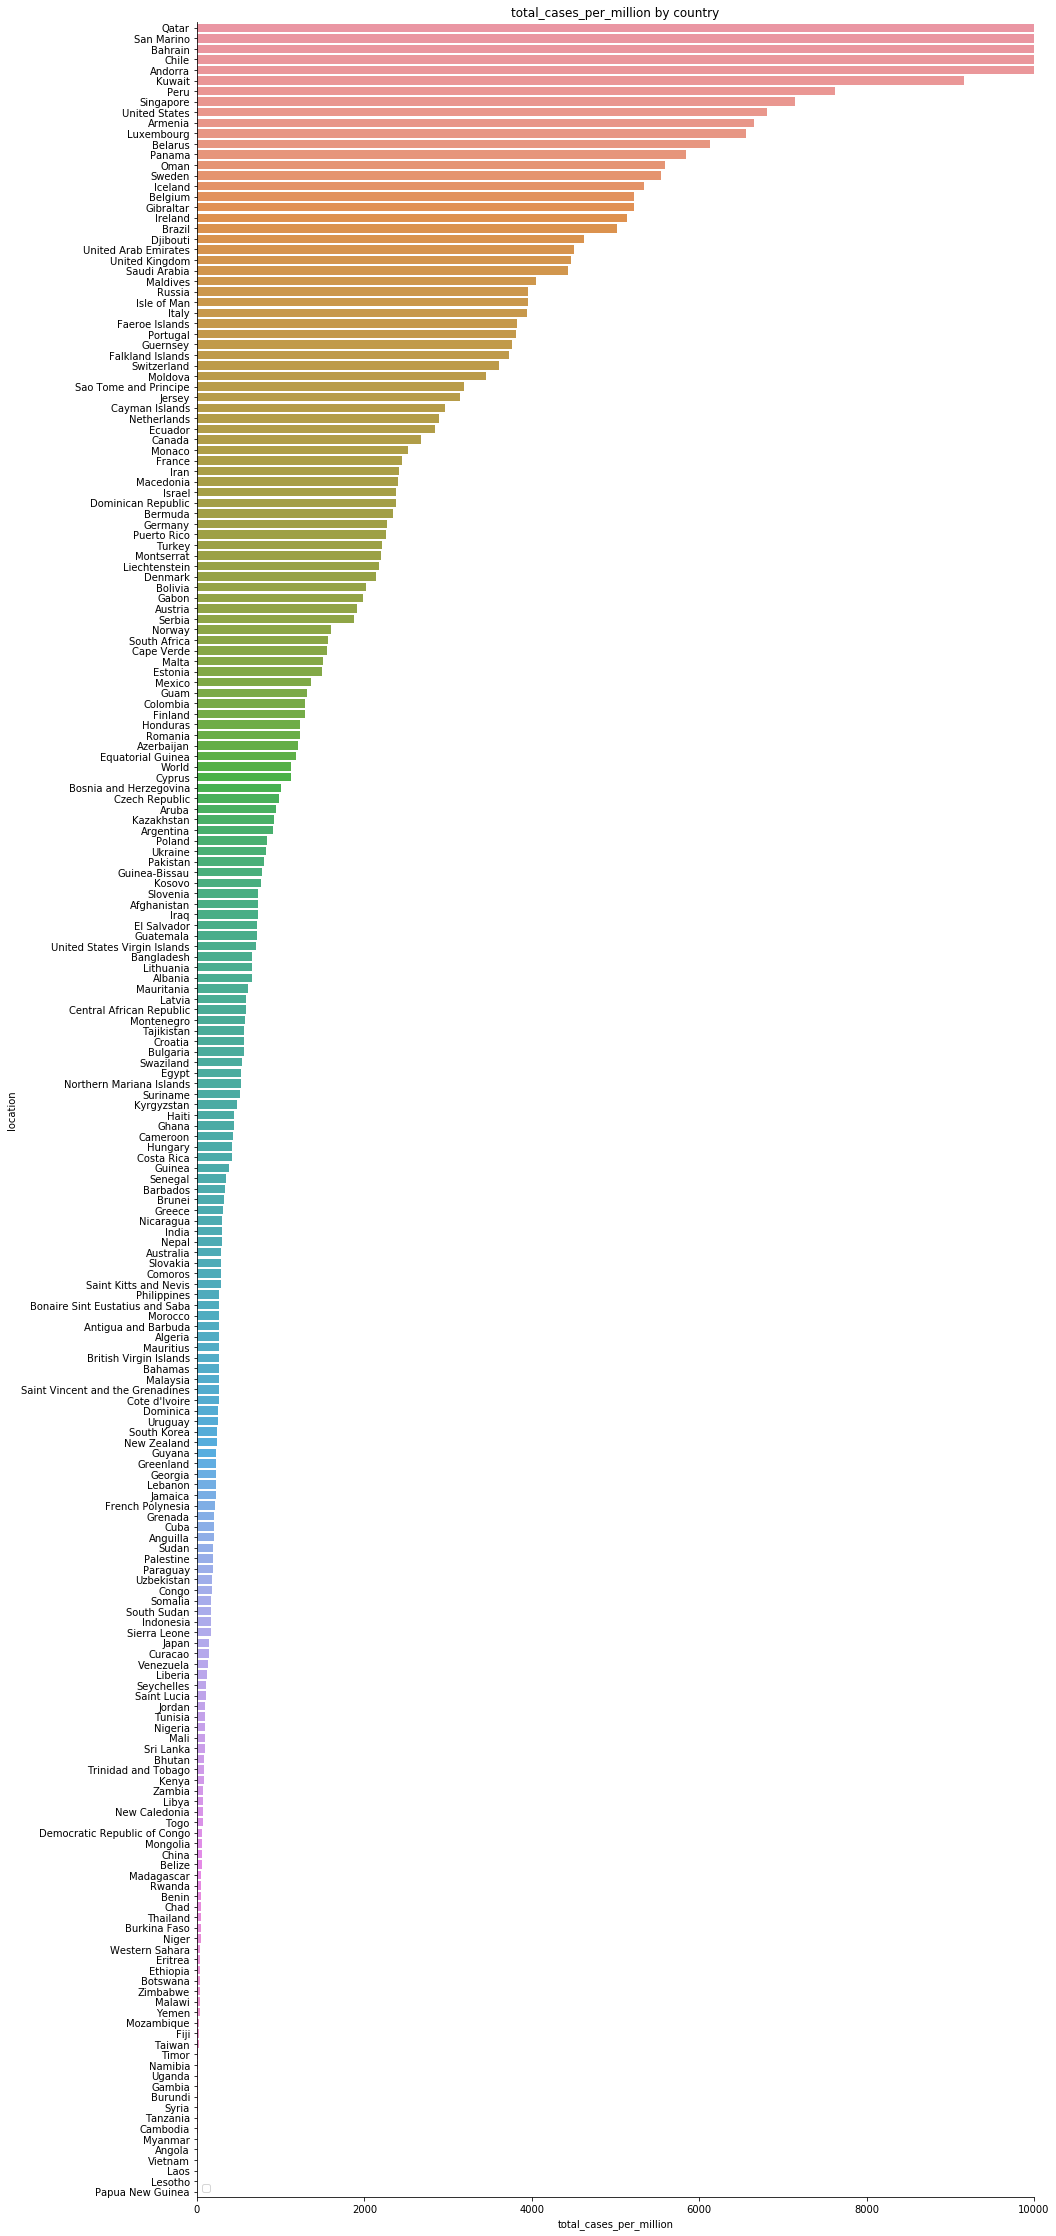

In [51]:
try:
    worldrep("total_cases_per_million",graph_long=40,val_larg=10000,df=dds)
except:
    print("Not today")

No handles with labels found to put in legend.


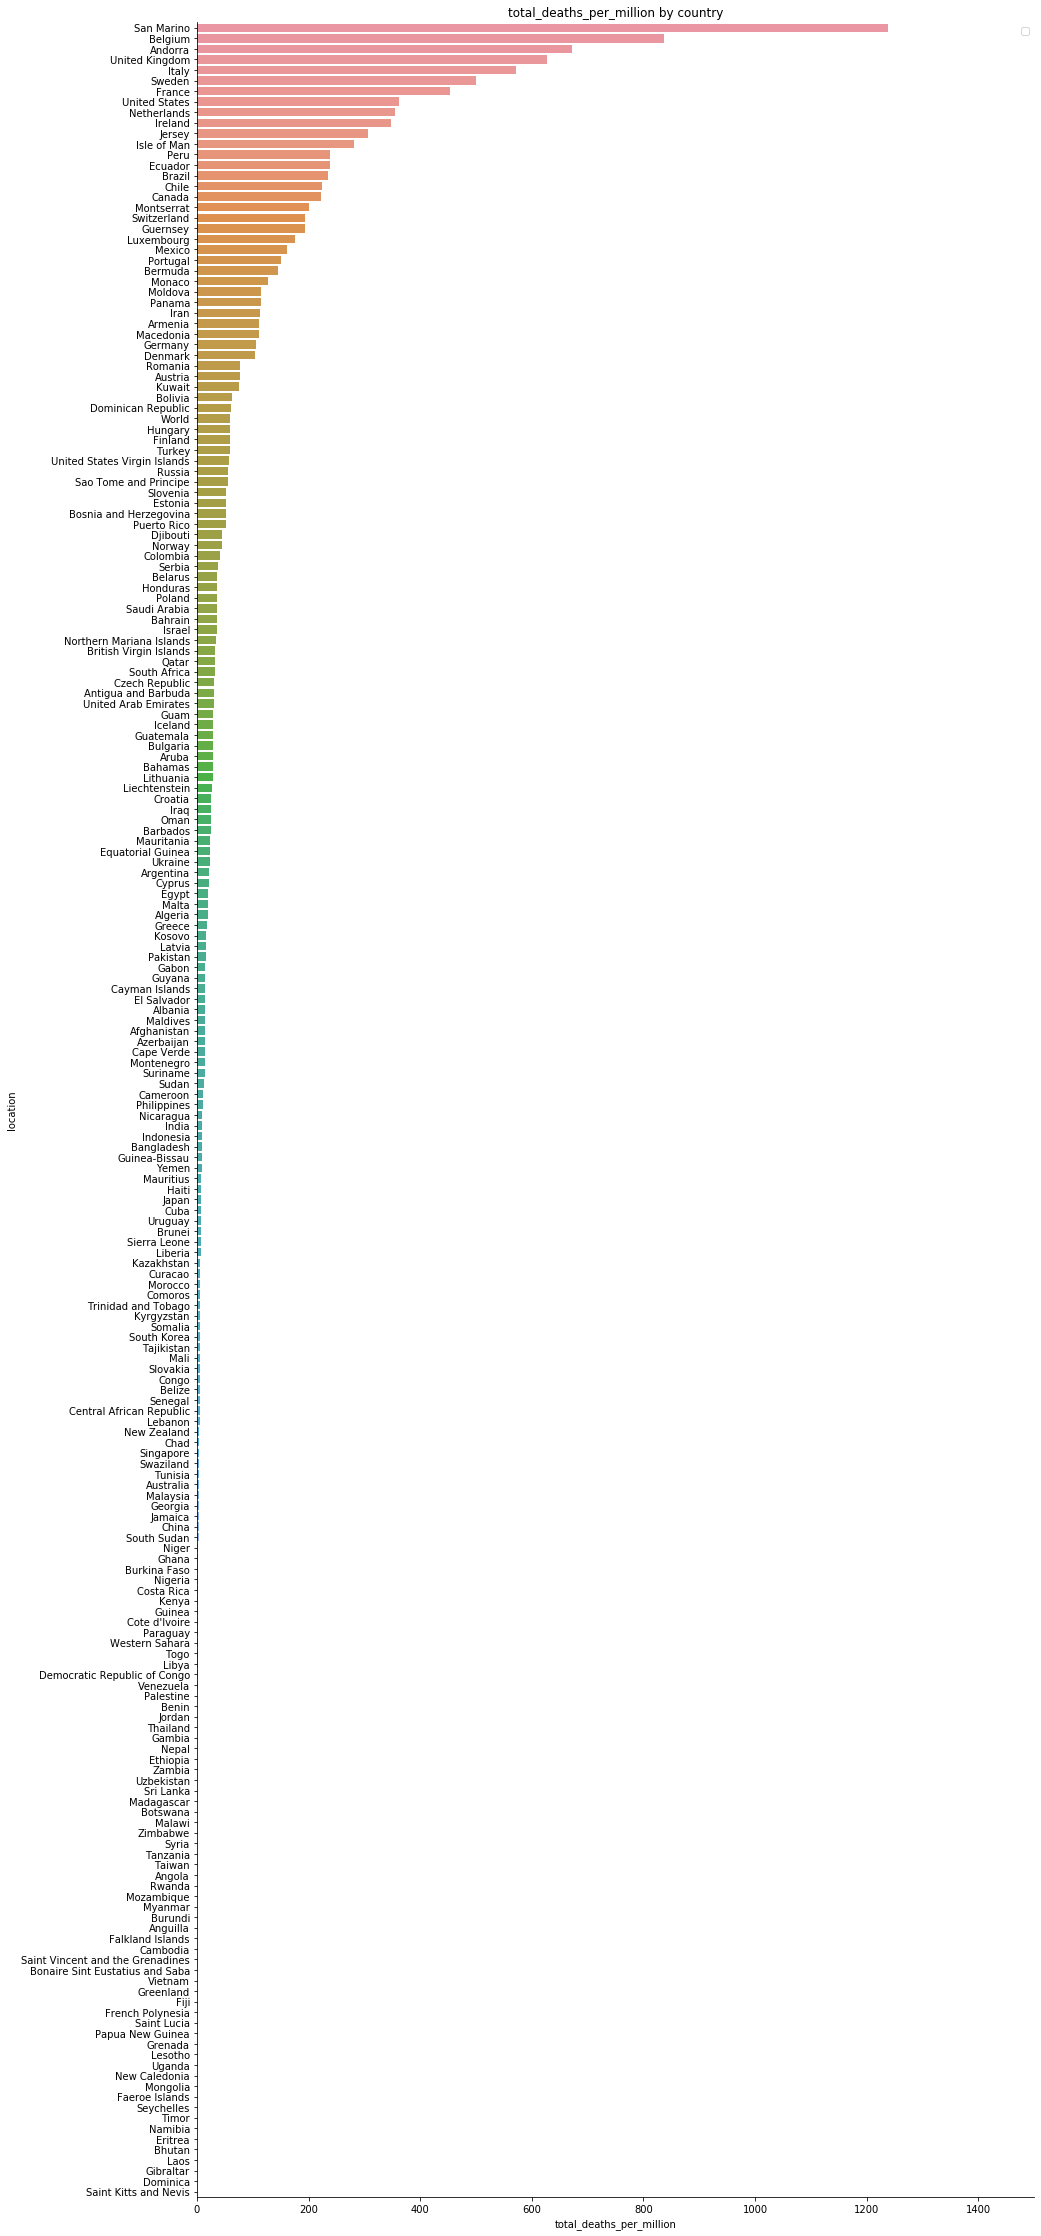

In [52]:
try :
    worldrep("total_deaths_per_million",graph_long=40,val_larg=1500,df=dds)
    is_full_data = True
except:
    is_full_data = False
    print("not today")

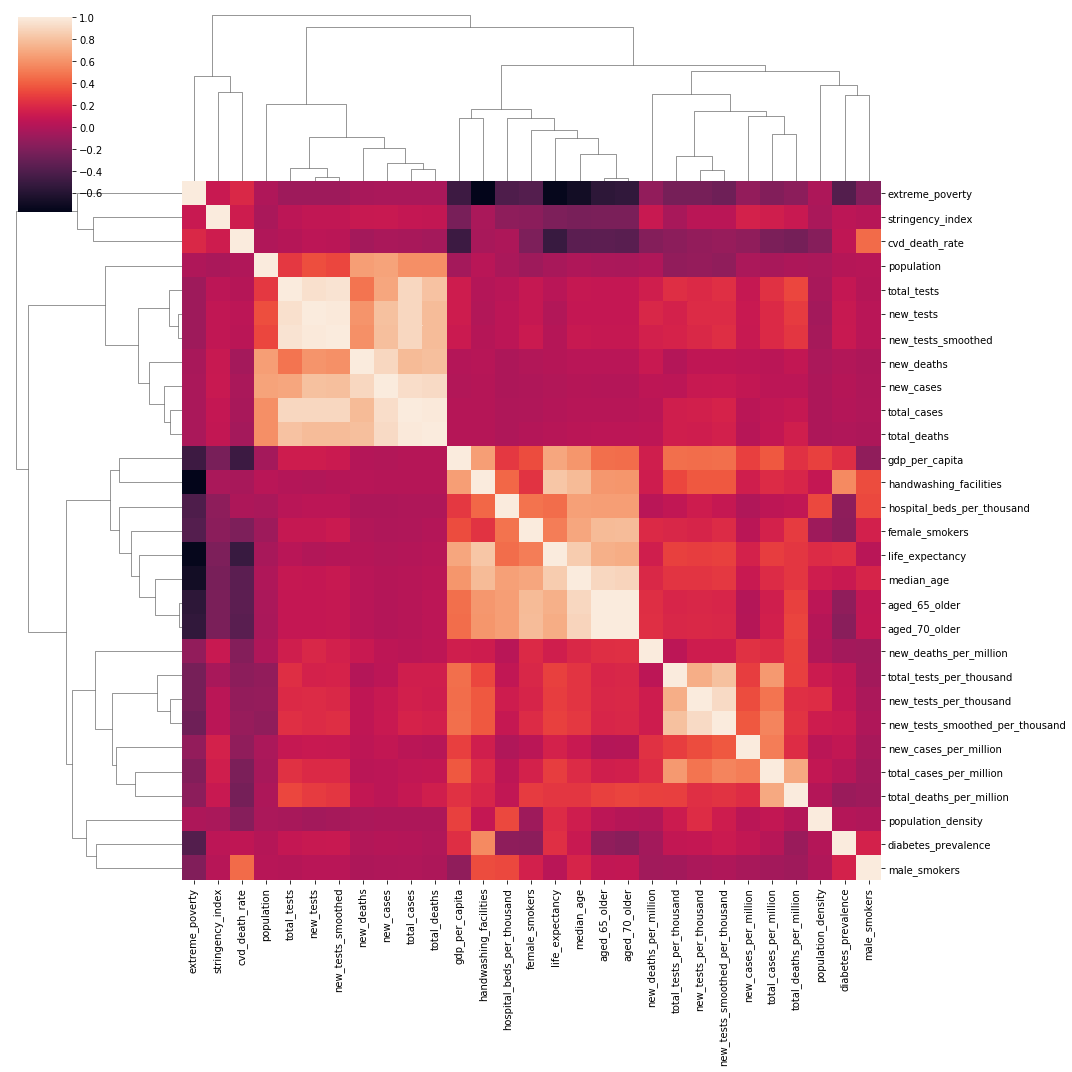

In [53]:
if is_full_data:
    corr = df.corr()
    sns.clustermap(corr,figsize=(15, 15))
else :
    print("not today")

# Modeling routines

In [54]:
def createModel(subject,periode,country,n_splits=3,max_iter=5000):
    
    df = pd.read_csv(f"AzureSC\\Base_Files\\full_data{date.today()}.csv")
    df = df[df['location'].isin([f"{country}"])] 
    vals = df[[f"{subject}"]].values
    
    hisShape = vals.shape[0]
    x_train = []
    y_train = []

    for i in range(periode,hisShape):
        x_train.append(vals[(i-periode):i,0]) 
        y_train.append(vals[i,0])

    x_train = np.array(x_train) 
    y_train = np.array(y_train)
    
    ###############################################################
    model = ElasticNet(random_state=0,max_iter=max_iter) 
    # tol=0.01 by reducing this hp warning disapear, pred will be highter 
    ###############################################################
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    scores = cross_val_score(model, x_train, y_train, cv=tscv)
    print(f"R^2: {scores.mean()} (+/- {scores.std()})")
    
    model.fit(x_train,y_train)
    print("Coef : ",model.coef_)
    
    return vals, x_train,y_train, model

In [55]:
def predicTomorow(vals,model,periode):
    tmw = vals[-periode:]
    lili = []
    for i in tmw:
        lili.append(int(i))
    lili = np.array(lili).reshape(1, -1) 
    res = int(model.predict(lili))
    last_day = lili[0][periode-1]
    diff_betw = res-last_day
    print(f"{periode} Last_days : ",lili)
    print("Today : ",last_day)
    print("Prediction + : ",diff_betw)
    print("Tomorow : ",res)
    return last_day, res

In [56]:
def conbine(subject,periode,country):
    vals, x_train, y_train, model = createModel(subject,periode,country)
    last_day, ress = predicTomorow(vals,model,periode)
    return last_day, ress

In [57]:
def fullRoutines(df,periode,country):
    print(f"********* For {country} **************")
    print("                                     ")
    print("--------- Total Cases -----------------")
    print("                                     ")
    last_day_cases, res1 = conbine("total_cases",periode,f"{country}")
    print("                                     ")
    print("--------- Total Death -----------------")
    print("                                     ")
    last_day_death, res2 = conbine("total_deaths",periode,f"{country}")
    print("                                     ")
    return last_day_cases, last_day_death, res1, res2

# Prediction Tomorow

In [58]:
periode = 3

In [59]:
last_day_cases, last_day_death, res1ww, res2ww = fullRoutines(df,periode,"World")
world_data = last_day_cases, last_day_death, res1ww, res2ww

********* For World **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.9984034312387866 (+/- 0.001213015351949483)
Coef :  [-0.07721794  0.54921219  0.55241355]
3 Last_days :  [[8456815 8634087 8795672]]
Today :  8795672
Prediction + :  172581
Tomorow :  8968253
                                     
--------- Total Death -----------------
                                     
R^2: 0.9972982635662917 (+/- 0.0014404283229727663)
Coef :  [-0.74334587  0.83441695  0.91254091]
3 Last_days :  [[456956 461982 466189]]
Today :  466189
Prediction + :  5553
Tomorow :  471742
                                     


In [60]:
last_day_casesfr, last_day_deathfr, res1fr, res2fr = fullRoutines(df,periode,"France")
french_data = last_day_casesfr, last_day_deathfr, res1fr, res2fr

********* For France **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.8901306948393032 (+/- 0.11312326770573533)
Coef :  [-0.7845143   0.68682287  1.09722277]
3 Last_days :  [[158641 159452 160093]]
Today :  160093
Prediction + :  770
Tomorow :  160863
                                     
--------- Total Death -----------------
                                     
R^2: 0.5602575270913946 (+/- 0.5900869580432555)
Coef :  [-0.73433249  0.58214545  1.15144715]
3 Last_days :  [[29603 29617 29633]]
Today :  29633
Prediction + :  18
Tomorow :  29651
                                     


In [61]:
last_day_casesch, last_day_deathch, res1ch, res2ch = fullRoutines(df,periode,"China")
china_data = last_day_casesch, last_day_deathch, res1ch, res2ch

********* For China **************
                                     
--------- Total Cases -----------------
                                     
R^2: -2.2718227975043117 (+/- 4.393407454438196)
Coef :  [-0.30774498 -0.04973014  1.35176931]
3 Last_days :  [[84494 84524 84553]]
Today :  84553
Prediction + :  67
Tomorow :  84620
                                     
--------- Total Death -----------------
                                     
R^2: -1239.26361790478 (+/- 1753.4061704483474)
Coef :  [-0.07262299  0.01217232  1.05369367]
3 Last_days :  [[4638 4638 4639]]
Today :  4639
Prediction + :  11
Tomorow :  4650
                                     


In [62]:
last_day_casesit, last_day_deathit, res1it, res2it = fullRoutines(df,periode,"Italy")
italy_data = last_day_casesit, last_day_deathit, res1it, res2it

********* For Italy **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.8989104072704892 (+/- 0.1401771035366951)
Coef :  [-0.87757116  0.92411649  0.95295058]
3 Last_days :  [[238159 238011 238275]]
Today :  238275
Prediction + :  25
Tomorow :  238300
                                     
--------- Total Death -----------------
                                     
R^2: 0.5084119700730373 (+/- 0.6903247306236415)
Coef :  [-0.87300225  0.92168264  0.95105538]
3 Last_days :  [[34514 34561 34610]]
Today :  34610
Prediction + :  69
Tomorow :  34679
                                     


In [63]:
try:
    last_day_casessp, last_day_deathsp, res1sp, res2sp = fullRoutines(df,periode,"Spain")
    spain_data = last_day_casessp, last_day_deathsp, res1sp, res2sp
except:
    print("No spain update")

********* For Spain **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.5371877073358146 (+/- 0.6396653658187396)
Coef :  [-0.88030208  0.90696508  0.9725741 ]
3 Last_days :  [[245268 245575 245938]]
Today :  245938
Prediction + :  368
Tomorow :  246306
                                     
--------- Total Death -----------------
                                     
R^2: 0.508486948026767 (+/- 0.5331296866886686)
Coef :  [-0.85472437  0.88810958  0.96688923]
3 Last_days :  [[29054 30233 30240]]
Today :  30240
Prediction + :  1050
Tomorow :  31290
                                     


In [64]:
last_day_casesus, last_day_deathus, res1us, res2us = fullRoutines(df,periode,"United States")
usa_data = last_day_casesus, last_day_deathus, res1us, res2us

********* For United States **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.9747886118822935 (+/- 0.035052486895222695)
Coef :  [-0.7575219   0.8642943   0.89733066]
3 Last_days :  [[2191052 2220961 2255119]]
Today :  2255119
Prediction + :  30634
Tomorow :  2285753
                                     
--------- Total Death -----------------
                                     
R^2: 0.4258634343291598 (+/- 0.5020634879261094)
Coef :  [-0.7995759   0.84765868  0.95349997]
3 Last_days :  [[118434 119112 119719]]
Today :  119719
Prediction + :  828
Tomorow :  120547
                                     


In [65]:
last_day_casesuk, last_day_deathuk, res1uk, res2uk = fullRoutines(df,periode,"United Kingdom")
uk_data = last_day_casesuk, last_day_deathuk, res1uk, res2uk

********* For United Kingdom **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.8718515018625773 (+/- 0.12710561790853572)
Coef :  [-0.82389488  0.87862748  0.94637987]
3 Last_days :  [[300469 301815 303110]]
Today :  303110
Prediction + :  1693
Tomorow :  304803
                                     
--------- Total Death -----------------
                                     
R^2: 0.47616807966203684 (+/- 0.5100329220463976)
Coef :  [-0.80274447  0.83736252  0.96622459]
3 Last_days :  [[42288 42461 42589]]
Today :  42589
Prediction + :  218
Tomorow :  42807
                                     


In [66]:
last_day_casesger, last_day_deathger, res1ger, res2ger = fullRoutines(df,periode,"Germany")
ger_data = last_day_casesger, last_day_deathger, res1ger, res2ger

********* For Germany **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.9603665764299759 (+/- 0.03208964111182706)
Coef :  [-0.8536012   0.88155761  0.97160622]
3 Last_days :  [[188534 189135 189822]]
Today :  189822
Prediction + :  644
Tomorow :  190466
                                     
--------- Total Death -----------------
                                     
R^2: 0.45546711954816893 (+/- 0.5036814650091429)
Coef :  [-0.79964573  0.82124862  0.97857258]
3 Last_days :  [[8872 8882 8882]]
Today :  8882
Prediction + :  20
Tomorow :  8902
                                     


In [67]:
last_day_casesIran, last_day_deathIran, res1Iran, res2Iran = fullRoutines(df,periode,"Iran")
Iran_data = last_day_casesIran, last_day_deathIran, res1Iran, res2Iran

********* For Iran **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.3776941730027546 (+/- 0.8765776006306205)
Coef :  [-0.55252283  0.76050619  0.80022143]
3 Last_days :  [[197647 200262 202584]]
Today :  202584
Prediction + :  2939
Tomorow :  205523
                                     
--------- Total Death -----------------
                                     
R^2: 0.45575857899587824 (+/- 0.7658029062976305)
Coef :  [-0.75119725  0.84403915  0.90954861]
3 Last_days :  [[9272 9392 9507]]
Today :  9507
Prediction + :  114
Tomorow :  9621
                                     


In [68]:
last_day_casesTurk, last_day_deathTurk, res1Turk, res2Turk = fullRoutines(df,periode,"Turkey")
Turk_data = last_day_casesTurk, last_day_deathTurk, res1Turk, res2Turk

********* For Turkey **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.9978306095206132 (+/- 0.0011604202989878203)
Coef :  [-0.84999083  0.89738062  0.94984433]
3 Last_days :  [[184031 185245 186493]]
Today :  186493
Prediction + :  1141
Tomorow :  187634
                                     
--------- Total Death -----------------
                                     
R^2: 0.9986546146148295 (+/- 0.0010690457987981826)
Coef :  [-0.88721716  0.93340709  0.9512035 ]
3 Last_days :  [[4882 4905 4927]]
Today :  4927
Prediction + :  22
Tomorow :  4949
                                     


In [69]:
last_day_casesBraz, last_day_deathBraz, res1Braz, res2Braz = fullRoutines(df,periode,"Brazil")
Braz_data = last_day_casesBraz, last_day_deathBraz, res1Braz, res2Braz

********* For Brazil **************
                                     
--------- Total Cases -----------------
                                     
R^2: 0.569975282992426 (+/- 0.6035436162975134)
Coef :  [-0.43407287  0.49637903  0.9625171 ]
3 Last_days :  [[ 978142 1032913 1067579]]
Today :  1067579
Prediction + :  48819
Tomorow :  1116398
                                     
--------- Total Death -----------------
                                     
R^2: 0.5760053131737967 (+/- 0.5426160051157856)
Coef :  [-0.55384107  0.63516361  0.93349335]
3 Last_days :  [[47748 48954 49976]]
Today :  49976
Prediction + :  1371
Tomorow :  51347
                                     


In [70]:
model_data = [world_data, french_data, italy_data, spain_data, usa_data,
              china_data, uk_data, ger_data, Iran_data, Turk_data, Braz_data]

In [71]:
model_data

[(8795672, 466189, 8968253, 471742),
 (160093, 29633, 160863, 29651),
 (238275, 34610, 238300, 34679),
 (245938, 30240, 246306, 31290),
 (2255119, 119719, 2285753, 120547),
 (84553, 4639, 84620, 4650),
 (303110, 42589, 304803, 42807),
 (189822, 8882, 190466, 8902),
 (202584, 9507, 205523, 9621),
 (186493, 4927, 187634, 4949),
 (1067579, 49976, 1116398, 51347)]

In [72]:
dump(model_data, "endPoint/CovidDataPred.joblib")

['endPoint/CovidDataPred.joblib']

In [73]:
def popPred(country,rez1,rez2):
    pop_pred = pd.DataFrame()

    pop_pred.loc[0,"date"] = date.today()
    pop_pred.loc[0,"country"] = country
    pop_pred.loc[0,"total_cases_predict"] = rez1
    pop_pred.loc[0,"total_cases_real"] = 0
    pop_pred.loc[0,"total_deaths_predict"] = rez2
    pop_pred.loc[0,"total_deaths_real"] = 0
    pop_pred.loc[0,"error_abs_cases"] = 0
    pop_pred.loc[0,"error_abs_deaths"] = 0
    
    return pop_pred

In [74]:
df_pop_pred1 = popPred("France",res1fr, res2fr)
df_pop_pred2 = popPred("China",res1ch, res2ch)
df_pop_pred3 = popPred("Italy",res1it, res2it)
df_pop_pred4 = popPred("Spain",res1sp, res2sp)
df_pop_pred5 = popPred("United States",res1us, res2us)
df_pop_pred6 = popPred("World",res1ww, res2ww)
df_pop_pred7 = popPred("United Kingdom",res1uk, res2uk)
df_pop_pred8 = popPred("Germany",res1ger, res2ger)
df_pop_pred9 = popPred("Iran",res1Iran, res2Iran)
df_pop_pred10 = popPred("Turkey",res1Turk, res2Turk)
df_pop_pred11 = popPred("Brazil",res1Braz, res2Braz)

frames = [df_pop_pred1, df_pop_pred2, df_pop_pred3, df_pop_pred4,
          df_pop_pred5, df_pop_pred6, df_pop_pred7, df_pop_pred8,
          df_pop_pred9, df_pop_pred10, df_pop_pred11]

predpred = pd.concat(frames)
predpred

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-06-21,France,160863.0,0.0,29651.0,0.0,0.0,0.0
0,2020-06-21,China,84620.0,0.0,4650.0,0.0,0.0,0.0
0,2020-06-21,Italy,238300.0,0.0,34679.0,0.0,0.0,0.0
0,2020-06-21,Spain,246306.0,0.0,31290.0,0.0,0.0,0.0
0,2020-06-21,United States,2285753.0,0.0,120547.0,0.0,0.0,0.0
0,2020-06-21,World,8968253.0,0.0,471742.0,0.0,0.0,0.0
0,2020-06-21,United Kingdom,304803.0,0.0,42807.0,0.0,0.0,0.0
0,2020-06-21,Germany,190466.0,0.0,8902.0,0.0,0.0,0.0
0,2020-06-21,Iran,205523.0,0.0,9621.0,0.0,0.0,0.0
0,2020-06-21,Turkey,187634.0,0.0,4949.0,0.0,0.0,0.0


In [75]:
predpred.to_csv(f"AzureSC\\Pred\\predDf{date.today()}.csv")